# Import Packages

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [3]:
class_names = ['pituitary_tumor','no_tumor','meningioma_tumor','glioma_tumor']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [4]:
def load_data():
    datasets = [r'C:\Users\shashank\Downloads\Brain Tumor\Brain Tumor\Training', r'C:\Users\shashank\Downloads\Brain Tumor\Brain Tumor\Testing']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\shashank\Downloads\Brain Tumor\Brain Tumor\Training


100%|███████████████████████████████████████████████████████████████████████████████| 827/827 [00:02<00:00, 400.15it/s]


Loading C:\Users\shashank\Downloads\Brain Tumor\Brain Tumor\Testing


100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 173.01it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2870
Number of testing examples: 394
Each image is of size: (150, 150)


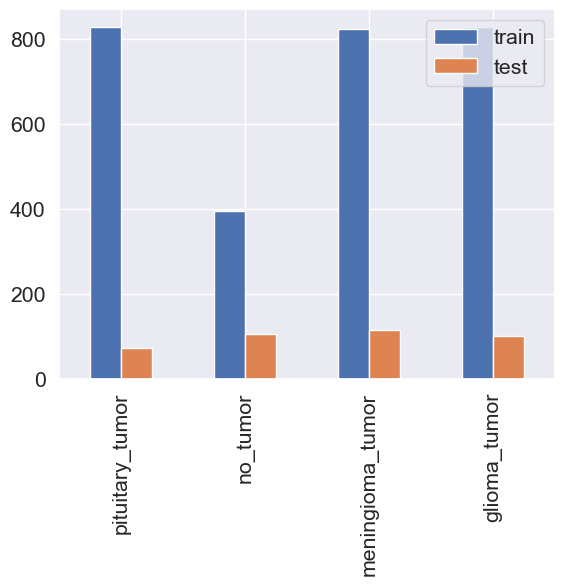

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

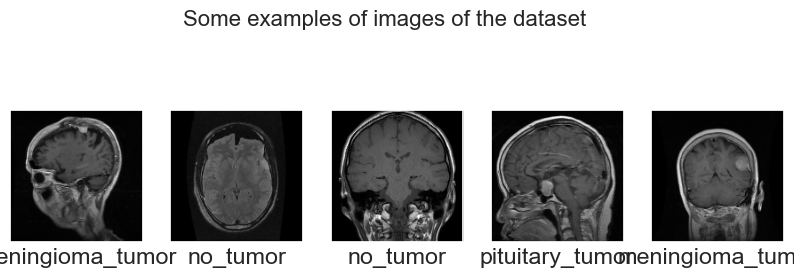

In [11]:
display_examples(class_names, train_images, train_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
18/18 [==============================] - 27s 1s/step - loss: 1.6216 - accuracy: 0.4116 - val_loss: 1.0849 - val_accuracy: 0.5540
Epoch 2/10
18/18 [==============================] - 21s 1s/step - loss: 0.9223 - accuracy: 0.6071 - val_loss: 0.7723 - val_accuracy: 0.6812
Epoch 3/10
18/18 [==============================] - 20s 1s/step - loss: 0.6423 - accuracy: 0.7413 - val_loss: 0.6158 - val_accuracy: 0.7683
Epoch 4/10
18/18 [==============================] - 21s 1s/step - loss: 0.5040 - accuracy: 0.8127 - val_loss: 0.5641 - val_accuracy: 0.7857
Epoch 5/10
18/18 [==============================] - 22s 1s/step - loss: 0.3809 - accuracy: 0.8558 - val_loss: 0.5391 - val_accuracy: 0.7927
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.2831 - accuracy: 0.9011 - val_loss: 0.5240 - val_accuracy: 0.8362
Epoch 7/10
18/18 [==============================] - 21s 1s/step - loss: 0.2054 - accuracy: 0.9416 - val_loss: 0.5017 - val_accuracy: 0.8432
Epoch 8/10
18/18 [==

In [15]:
test_loss = model.evaluate(test_images, test_labels)

13/13 [==============================] - 1s 53ms/step - loss: 2.6868 - accuracy: 0.7208


13/13 [==============================] - 1s 50ms/step


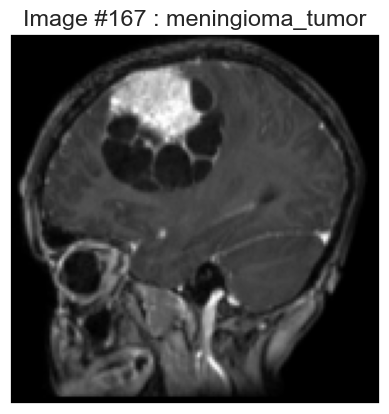

In [16]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

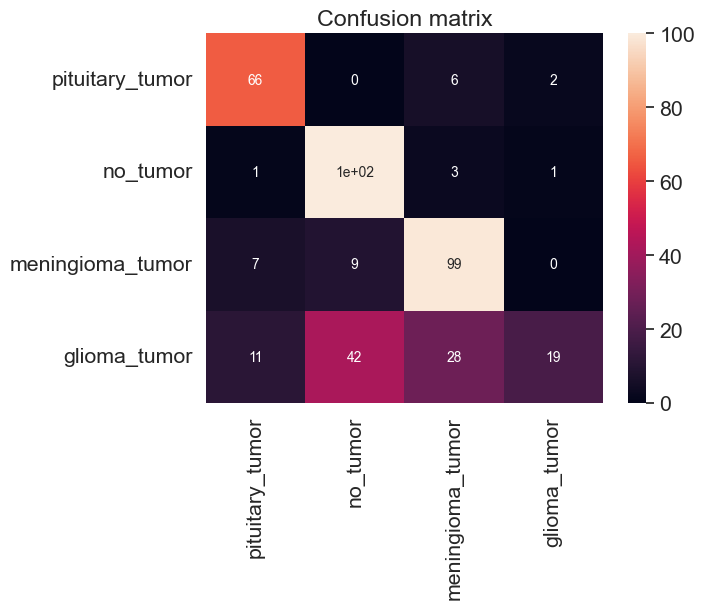

In [17]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [18]:
model_json=model.to_json()
with open("model_tumor.json", "w") as json_file:
    json_file.write(model_json)

In [1]:
import joblib